# Support Vector Machine Tutorial.
## Binary Classifier



# Fields description follow:
## preg = Number of times pregnant
## plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
## pres = Diastolic blood pressure (mm Hg)
## skin = Triceps skin fold thickness (mm)
## test = 2-Hour serum insulin (mu U/ml)
## mass = Body mass index (weight in kg/(height in m)^2)
## pedi = Diabetes pedigree function
## age = Age (years)
## class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)





# Download the data and then convert it to pandas dataframe to analyze it.

In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [2]:
all_ds = pd.read_csv('datasets_14370_19291_pima-indians-diabetes.csv')
all_ds

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')

Number of rows/examples and columns in the dataset: (768, 9)


In [4]:
# Summary of information on the dataset.
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Cleaning the data.

In [5]:
print("Display NA values in each columns: ")
all_ds.isna().sum(axis=0)

Display NA values in each columns: 


preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
print("Display NULL values in each columns: ")
all_ds.isnull().sum()

Display NULL values in each columns: 


preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [7]:
# Remove the rows with NA values.
all_ds = all_ds.dropna()

# You can also use the following line to fill the NA with Zeros.
# all_ds = all_ds.fillna(0)
# all_ds = all_ds.fillna(mean_of_column)



In [8]:

all_ds = all_ds.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)


# Split the data into train/test splits.

In [9]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(460, 9)
(308, 9)


In [10]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(154, 9)
(154, 9)


In [11]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (460, 9)
 Test dataset       : (154, 9)
 Validation dataset : (154, 9)


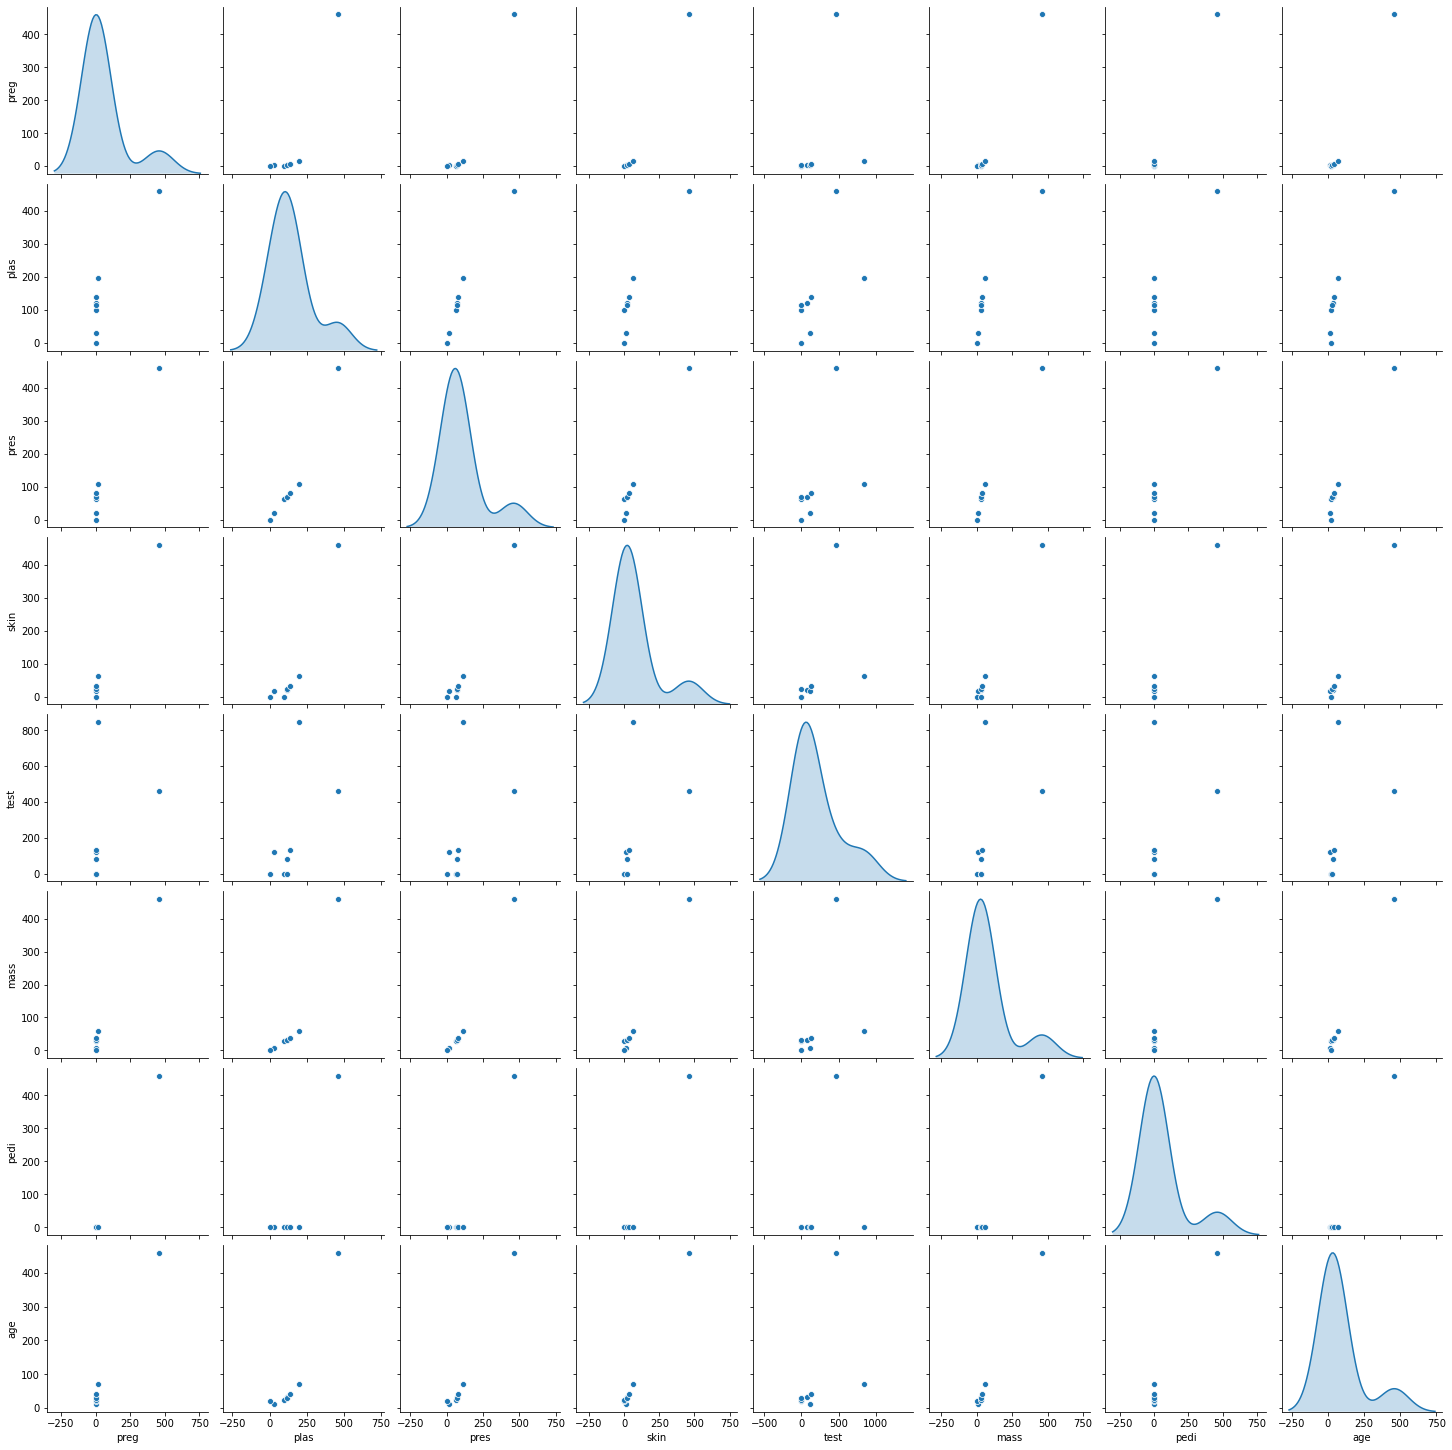

In [12]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("class")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'


In [13]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("class")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
preg,460.0,3.830435,3.377735,0.000,1.00000,3.000,6.00000,15.00
plas,460.0,120.243478,31.387685,0.000,99.00000,115.000,140.25000,198.00
pres,460.0,68.228261,19.887101,0.000,62.00000,70.000,80.00000,110.00
skin,460.0,20.339130,16.081160,0.000,0.00000,23.000,32.00000,63.00
test,460.0,79.354348,119.027369,0.000,0.00000,0.000,129.25000,846.00
mass,460.0,31.806739,8.183395,0.000,27.37500,32.000,36.50000,59.40
pedi,460.0,0.468554,0.324006,0.078,0.24675,0.378,0.62075,2.42
age,460.0,33.078261,11.318443,21.000,24.00000,29.000,41.00000,72.00


In [14]:

train_labels = train_dataset.pop('class')
test_labels = test_dataset.pop('class')
valid_labels = valid_dataset.pop('class')

# Data Normalization/Scaling
## Subtract the mean of the training data and divide by the standard deviation of the training data.

In [15]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)


In [16]:
# show a sample of the data after normalized
normed_train_data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age
492,0.050201,-0.676809,-0.011478,1.098234,-0.666690,0.121375,-0.998605,-0.006914
21,1.234426,-0.676809,0.793064,-1.264780,-0.666690,0.439092,-0.248620,1.495059
535,0.050201,0.374558,-3.430780,-1.264780,-0.666690,0.133595,-0.514046,-0.890428
304,-0.245856,0.948032,0.390793,-1.264780,-0.666690,-1.320569,-0.807250,0.346491
399,-0.245856,2.317996,0.089090,0.662942,-0.666690,0.377992,-0.702314,-0.713725
518,2.714708,-1.409581,-0.413749,-1.264780,-0.666690,0.121375,-0.890582,0.699897
272,-0.245856,0.055962,0.491361,-1.264780,-0.666690,-1.076172,-0.662192,0.611545
572,-0.245856,-0.294494,-0.514316,0.662942,-0.297027,-0.281880,-0.118993,-0.978780
735,0.050201,-0.804248,-0.413749,0.725126,-0.666690,0.439092,-0.569601,-0.448671
391,0.346257,1.457786,0.390793,-1.264780,-0.666690,1.697738,-0.396765,-0.537023


# Training the model 

In [17]:
#Create a svm Classifier
model = svm.SVC(C = 1, # reg paramater
                kernel='linear', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
               ) # Linear Kernel

#Train the model using the training sets
model.fit(normed_train_data, train_labels)

#Predict the response for test dataset
y_pred = model.predict(normed_test_data)

In [18]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

# See how the training went by plotting the loss/mse across epochs


In [19]:
from sklearn import metrics
y_pred = model.predict(normed_train_data)
print("Accuracy:",metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.7913043478260869


In [20]:
y_pred = model.predict(normed_valid_dataset)
print("Accuracy:",metrics.accuracy_score(valid_labels, y_pred))

Accuracy: 0.7922077922077922


In [21]:
y_pred = model.predict(normed_test_data)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.7337662337662337


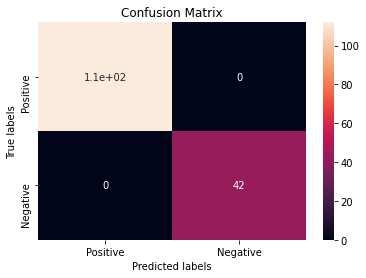

In [22]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

cm = confusion_matrix(predict_results, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


## 